In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import numpy as np

DB = 'DB3'

In [23]:
rawData = pd.read_csv("Comentarios_classificados/comentarios_"+ DB + ".csv", sep=';')

# filteredData = rawData
filteredData = rawData.fillna("vazio")
filteredData = filteredData.drop(columns=['Unnamed: 0'],axis=1)
display(filteredData)

,Comentario,Classificacao
0,"Isso é muito bom,porém estudos mostram\nque es...",n
1,Entender e praticar isso tudo é ordemmmmm!!!!...,x
2,Sensacional,p
3,ola parabens pelo trabalho,x
4,Primeira vez que vejo uma edição nesse nível ...,x
...,...,...
3242,Não acredito! Manipulação!!,x
3243,"Dean Winchester foi e voltou do inferno, entre...",x
3244,Um raça que sempre acreditou e se curvou peran...,n
3245,Qual é o site ou nome dessa outra IA que você ...,x


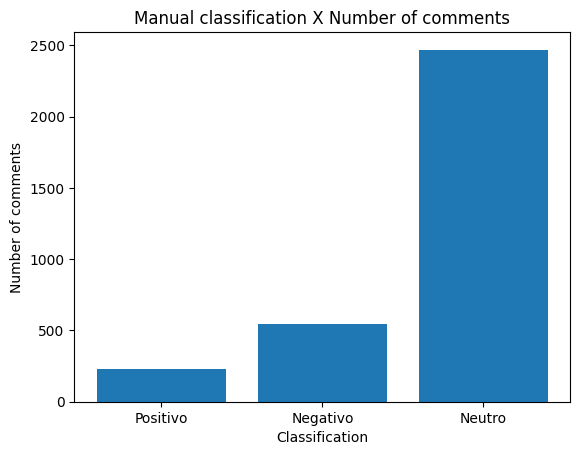

In [24]:
plt.bar(x=['Positivo','Negativo','Neutro'],height=[(filteredData[filteredData['Classificacao']=="p"]['Comentario']).count(),(filteredData[filteredData['Classificacao']=="n"]['Comentario']).count(), (filteredData[filteredData['Classificacao']=="x"]['Comentario']).count()])
plt.ylabel("Number of comments")
plt.xlabel("Classification")
plt.title("Manual classification X Number of comments")
plt.show()

Separando os dados em treino e teste

In [25]:
def sepAleatorioTreinoTeste(dado,percetagemTeste):
    # print(dado.count()[0])
    # print(round(dado.count()[0]*percetagemTeste))
    cp = dado.copy().reset_index(drop=True)
    # display(cp)

    d = list(range(cp.count()[0]))
    random.shuffle(d)
    d = d[:round(cp.count()[0]*percetagemTeste)]
    
    # display(cp.loc[cp['index'].isin(d)])
    test = dado.loc[cp.index.isin(d)]
    train = dado.loc[(~cp.index.isin(d))]

    return test,train


teste, treino = sepAleatorioTreinoTeste(filteredData,0.25)

teste_X = list(teste['Comentario'])
teste_Y = list(teste['Classificacao'].replace({"n":0 , "p":1, "x": 2}))

treino_X = list(treino['Comentario'])
treino_Y = list(treino['Classificacao'].replace({"n":0 , "p":1, "x":2}))

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
vectorizer = vectorizer.fit(filteredData['Comentario'])
# display(treino_X)
treino_X_tk = vectorizer.transform(treino_X)


# display(treino_X)
teste_X_tk = vectorizer.transform(teste_X)

# display(teste_Y)

Classificador Bayesiano

'Score dados de treino: 0.7856262833675565'

'Score dados de teste: 0.7660098522167488'

Text(0.5, 1.0, 'Matriz de confusão')

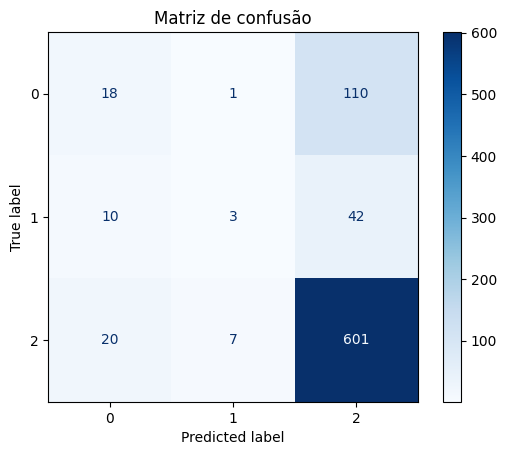

In [27]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import ConfusionMatrixDisplay

model = BernoulliNB()

model = model.fit(treino_X_tk,treino_Y)

display("Score dados de treino: " + str(model.score(treino_X_tk,treino_Y)))


display("Score dados de teste: " + str(model.score(teste_X_tk,teste_Y)))

disp = ConfusionMatrixDisplay.from_estimator(
        model,
        teste_X_tk,
        teste_Y,
        cmap=plt.cm.Blues,
        # display_labels=class_names,
        # normalize=normalize,
    )
disp.ax_.set_title("Matriz de confusão")


In [28]:
from gensim.models import KeyedVectors
word2Vec = KeyedVectors.load_word2vec_format('word2Vec/cbow_s50.txt')

def convertToW2Vec(vetor, w2vec):
    w2v = []
    for linhaFrase in range(len(vetor)):
        w2v.append(w2vec.get_mean_vector(vetor[linhaFrase].split()))

    return w2v


In [29]:
treino_X_w2v = convertToW2Vec(treino_X,word2Vec)
teste_X_w2v = convertToW2Vec(teste_X,word2Vec)

'Score dados de treino: 0.7075975359342915'

'Score dados de teste: 0.6945812807881774'

Text(0.5, 1.0, 'Matriz de confusão')

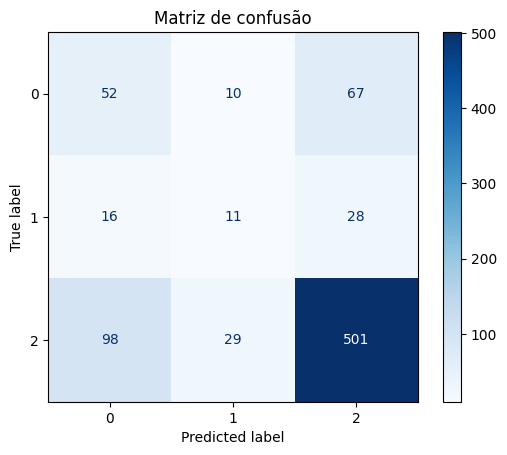

In [30]:

model = BernoulliNB()

model = model.fit(treino_X_w2v,treino_Y)

display("Score dados de treino: " + str(model.score(treino_X_w2v,treino_Y)))


display("Score dados de teste: " + str(model.score(teste_X_w2v,teste_Y)))

disp = ConfusionMatrixDisplay.from_estimator(
        model,
        teste_X_w2v,
        teste_Y,
        cmap=plt.cm.Blues,
        # display_labels=class_names,
        # normalize=normalize,
    )
disp.ax_.set_title("Matriz de confusão")


'Score dados de treino: 0.7893223819301848'

'Score dados de teste: 0.7697044334975369'

Text(0.5, 1.0, 'Matriz de confusão')

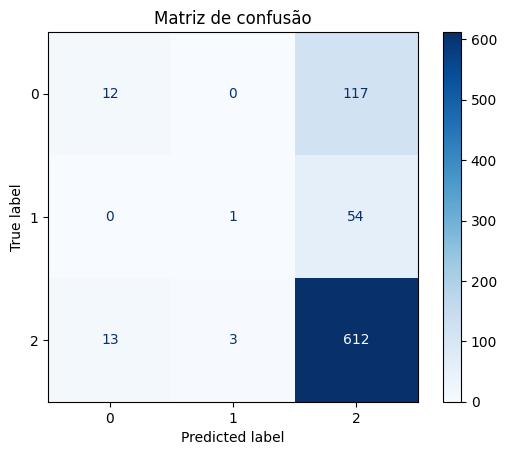

In [31]:
from sklearn.svm import SVC

svm = SVC(C = 100, gamma=0.5)
svm = svm.fit(treino_X_w2v,treino_Y)

display("Score dados de treino: " + str(svm.score(treino_X_w2v,treino_Y)))


display("Score dados de teste: " + str(svm.score(teste_X_w2v,teste_Y)))

disp = ConfusionMatrixDisplay.from_estimator(
        svm,
        teste_X_w2v,
        teste_Y,
        cmap=plt.cm.Blues,
        # display_labels=class_names,
        # normalize=normalize,
    )
disp.ax_.set_title("Matriz de confusão")


In [32]:


# score_in = []
# score_out = []
# best = [0,0,0,0]
# for c in range(100,10000,100):
#     for g in np.arange(0.1,5,0.1):
#         svm = SVC(C = c, gamma=g)
#         svm = svm.fit(treino_X_w2v,treino_Y)
#         score_in.append(svm.score(treino_X_w2v,treino_Y))
#         score_out.append(svm.score(teste_X_w2v,teste_Y))
#         if (best[3]<score_out[-1]):
#             best[0] = c
#             best[1] = g
#             best[2] = score_in[-1]
#             best[3] = score_out[-1]

In [33]:
# plt.plot(score_in)
# plt.plot(score_out)
# plt.show()

In [34]:
# svm = SVC(C = best[0], gamma=best[1])
# svm = svm.fit(treino_X_w2v,treino_Y)
# display(best)
# display("Score dados de treino: " + str(svm.score(treino_X_w2v,treino_Y)))


# display("Score dados de teste: " + str(svm.score(teste_X_w2v,teste_Y)))

# disp = ConfusionMatrixDisplay.from_estimator(
#         svm,
#         teste_X_w2v,
#         teste_Y,
#         cmap=plt.cm.Blues,
#         # display_labels=class_names,
#         # normalize=normalize,
#     )
# disp.ax_.set_title("Matriz de confusão")


In [35]:
from sklearn.metrics import balanced_accuracy_score

scoreB_in = []
scoreB_out = []
bestBscore = [0,0,0]
for c in range(800,6000,100):
    for g in np.arange(0.1,3,0.1):
        svm = SVC(C = c, gamma=g)
        svm = svm.fit(treino_X_w2v,treino_Y)
        score = balanced_accuracy_score(teste_Y,svm.predict(teste_X_w2v))
        scorein = balanced_accuracy_score(treino_Y,svm.predict(treino_X_w2v))
        scoreB_in.append(scorein)
        scoreB_out.append(score)
        if (bestBscore[2]<score):
            bestBscore[0] = c
            bestBscore[1] = g
            bestBscore[2] = score

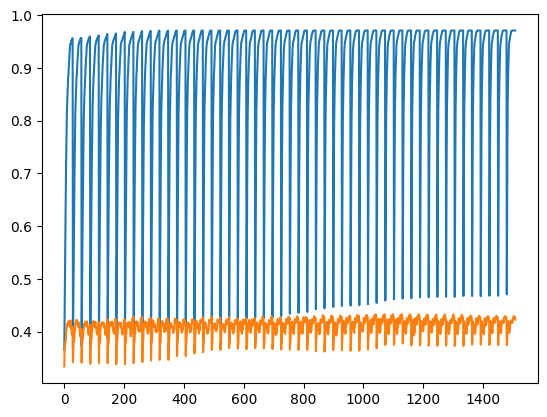

In [36]:
plt.plot(scoreB_in)
plt.plot(scoreB_out)
plt.show()

[4300, 2.7, 0.43290960261779404]

'Score dados de treino: 0.9901437371663244'

'Score dados de teste: 0.6859605911330049'

Text(0.5, 1.0, 'Confusion Matrix')

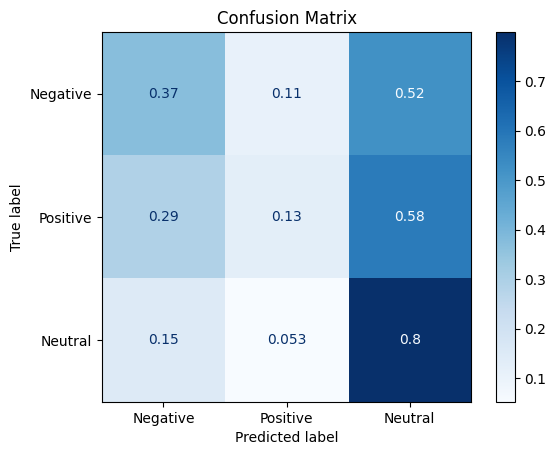

In [46]:
svm = SVC(C = bestBscore[0], gamma=bestBscore[1])
svm = svm.fit(treino_X_w2v,treino_Y)
display(bestBscore)
#melhor resultado obtido, caso precise rodar novamente [4300, 2.7, 0.43290960261779404]
display("Score dados de treino: " + str(svm.score(treino_X_w2v,treino_Y)))


display("Score dados de teste: " + str(svm.score(teste_X_w2v,teste_Y)))

disp = ConfusionMatrixDisplay.from_estimator(
        svm,
        teste_X_w2v,
        teste_Y,
        cmap=plt.cm.Blues,
        display_labels=['Negative','Positive','Neutral'],
        normalize='true',
    )
disp.ax_.set_title("Confusion Matrix")

In [58]:

w = convertToW2Vec(filteredData['Comentario'],word2Vec)
sav = pd.concat([filteredData, pd.DataFrame(svm.predict(w))],axis=1,ignore_index=True)
sav.columns = ['Comentario', 'ClassificacaoManual', 'ClassificacaoSVM']
savTreino = pd.concat([pd.DataFrame(treino_X),pd.DataFrame(treino_Y), pd.DataFrame(svm.predict(treino_X_w2v))],axis=1,ignore_index=True)
savTreino.columns = ['Comentario', 'ClassificacaoManual', 'ClassificacaoSVM']
savTeste = pd.concat([pd.DataFrame(teste_X),pd.DataFrame(teste_Y), pd.DataFrame(svm.predict(teste_X_w2v))],axis=1,ignore_index=True)
savTeste.columns = ['Comentario', 'ClassificacaoManual', 'ClassificacaoSVM']




In [60]:
sav.to_csv(path_or_buf="ResultadoSalvo/Resultado_Completo_ClassificadorNaoBinario_W2V50D_SVM.csv",sep=";")
savTreino.to_csv(path_or_buf="ResultadoSalvo/Resultado_Treino_ClassificadorNaoBinario_W2V50D_SVM.csv",sep=";")
savTeste.to_csv(path_or_buf="ResultadoSalvo/Resultado_Teste_ClassificadorNaoBinario_W2V50D_SVM.csv",sep=";")